In [41]:
import pandas as pd
import nltk
import MeCab
import re
import string
import matplotlib as mpl
import matplotlib.pyplot as plt
import platform
from wordcloud import WordCloud
import numpy as np

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Darwin":
    mpl.rc("font", family="AppleGothic")
elif platform.system() == "Windows":
    font_name = mpl.font_manager.FontProperties(fname=path).get_name()
    mpl.rc('font', family=font_name)

In [2]:
def pos(text):
    p = re.compile(".+\t[A-Z]+")
    return [tuple(p.match(line).group().split("\t")) for line in MeCab.Tagger().parse(text).splitlines()[:-1]]

def morphs(text):
    p = re.compile(".+\t[A-Z]+")
    return [p.match(line).group().split("\t")[0] for line in MeCab.Tagger().parse(text).splitlines()[:-1]]

def nouns(text):
    p = re.compile(".+\t[A-Z]+")
    temp = [tuple(p.match(line).group().split("\t")) for line in MeCab.Tagger().parse(text).splitlines()[:-1]]
    nouns=[]
    for word in temp:
        if word[1] in ["NNG", "NNP", "NNB", "NNBC", "NP", "NR"]:
            nouns.append(word[0])
    return nouns

def cln(text):
    return re.sub("[^„Ñ±-„Ö£Í∞Ä-Ìû£ ]", "", text)

def def_sw(path):
    sw = set()
    for i in string.punctuation:
        sw.add(i)
    with open(path, encoding="utf-8") as f:
        for word in f:
            sw.add(word.split("\n")[0])
    return sw

sw = def_sw("stopwords-ko.txt")

In [3]:
raw_data = pd.read_excel("Ïπ¥ÌÜ°.xlsx", index_col=0)

In [4]:
data = raw_data

msgs = [msg for msg in data["msg"]]

In [5]:
msgs

['ÏÉàÏö∞Îãπ ÏòàÏïΩÎ∂àÍ∞ÄÎÑ§..',
 'Îπ®Î¶¨ Í∞àÏàò ÏûàÎäîÏÇ¨Îûå Í∞ÄÏÑú Ïõ®Ïù¥ÌåÖ Í≥†Í≥†',
 'Í∑∏Ï†ïÎèÑ ÏãùÎãπÏûÑ?',
 'Ï†Ñ Îπ®Î¶¨ Î™ªÍ∞ëÎãàÎã§',
 'Ïò§ÌÇ§ÎèÑÌÇ§',
 'ÎãòÎì§ Îã§ 7ÏãúÏóê ÎèÑÏ∞©Í∞ÄÎä•?',
 '7Ïãú10Î∂Ñ ÏïÑÎãò?',
 '7Ïãú10Î∂Ñ Í≥†',
 'ÏïÑ „Öã„Öã',
 'Íπ®Ïïå 10Î∂Ñ',
 'Îã§Îì§ Ïñ¥Îîî?',
 'ÏÉ§Î°úÏàòÍ∏∏!',
 'Ïò¨',
 'ÎÇò ÏÉ§ÎåÄÏó≠',
 'ÎÇú',
 'ÎÇôÏÑ±ÎåÄ',
 'ÏïºÎì§ÏïÑ ÎÇò Î™© Í∞ÑÏßÄÎü¨ÏõÄ',
 'ÎßùÌïúÍ±∞?',
 '?',
 'Í∏ÅÏñ¥',
 '„Ñ¥„Ñ¥ Î™© ÏïàÏ™ΩÏù¥ Í∞ÄÎ†µÎã§Í≥†',
 'Ïôú',
 'Î™∞Îü¨ ÎßàÏä§ÌÅ¨ Ïò§ÎûòÍª¥ÏÑú Í∑∏Îü∞Í∞Ä',
 'Ïù¥Ï†úÎÇ¥Î¶º',
 'ÌïúÏ†ïÍ±∞Ïû• Îπ†Î•∏Í±∞ ÌÉîÎÇòÎ≥¥Îã§ ÎãàÍ∞Ä „Öã„Öã',
 'Ïó¨Í∏∞ ÏÇ¨Îûå Î≥ÑÎ°ú ÏóÜÎã§',
 'ÎèÑÏ∞©?',
 'Îã§ ÎèÑÏ∞©',
 'ÏïåÏïÑÏÑú ÏãúÌÇ§ÏÇº',
 '„Öá„Öã',
 'Í∞ÑÏû•ÏÉàÏö∞ ÏãúÌÇ¥',
 'Í±∞ÏùòÎã§Ïò¥',
 'Ïû¨Î∞åÏóàÎã§ ÏïàÎáΩ',
 '„Öã„Öã„Öã„ÖãÎÇú ÏïÑÏßÅ ÏÇ¨ÎãπÎèÑ Î™ªÍ∞ê',
 'Í±∞ÎÖ∏ ÏÉùÏùºÏ¶àÏùåÏóê Î¥ÖÏãúÎã§',
 'ÎÑàÎèÑ ÌÉùÏãúÌÉÄ „Öã„Öã',
 'Ïû¨ÎØ∏ÏûàÏóàÎã§ „Öã„Öã„Öã„Öã Ïò§ÌÇ§ÎèÑÌÇ§ „Öå„Öã„Öã',
 'Ïù¥ÎØ∏ ÏßÄÌïòÏ≤†ÌÉê„Öå„Öã„Öã„Öã',
 'Ïà†Ïßë 48000 Î∂ÑÏãù 6Ï≤ú Ìé∏ 5Ï≤ú100',
 'Í±∞ÎÖ∏Í∞Ä ÎåÄÏ†ëÌñ

In [6]:
msgs_joined = " ".join(msgs)

tot_tkns = morphs(msgs_joined)
tot_tkns = [tkn for tkn in tot_tkns if tkn not in sw and len(tkn)>=2]

In [7]:
tot_tkns

['Ïö∞Îãπ',
 'ÏòàÏïΩ',
 'Î∂àÍ∞Ä',
 'Îπ®Î¶¨',
 'ÏÇ¨Îûå',
 'Ïõ®Ïù¥ÌåÖ',
 'Í≥†Í≥†',
 'Ï†ïÎèÑ',
 'ÏãùÎãπ',
 'Îπ®Î¶¨',
 'Í∞ëÎãàÎã§',
 'Ïò§ÌÇ§',
 'ÎèÑÌÇ§',
 'ÎèÑÏ∞©',
 'Í∞ÄÎä•',
 '10',
 'ÏïÑÎãò',
 '10',
 '„Öã„Öã',
 'Íπ®Ïïå',
 '10',
 'ÎåÄÏó≠',
 'ÎÇôÏÑ±ÎåÄ',
 'Í∞ÑÏßÄÎü¨ÏõÄ',
 'ÎßùÌïú',
 'ÏïàÏ™Ω',
 'Í∞ÄÎ†µ',
 'Îã§Í≥†',
 'Î™∞Îü¨',
 'ÎßàÏä§ÌÅ¨',
 'Ïò§Îûò',
 'Íª¥ÏÑú',
 'Í∑∏Îü∞Í∞Ä',
 'Ïù¥Ï†ú',
 'ÎÇ¥Î¶º',
 'Ï†ïÍ±∞Ïû•',
 'Îπ†Î•∏',
 'Î≥¥Îã§',
 '„Öã„Öã',
 'ÏÇ¨Îûå',
 'Î≥ÑÎ°ú',
 'ÎèÑÏ∞©',
 'ÎèÑÏ∞©',
 'ÏïÑÏÑú',
 'ÏãúÌÇ§',
 '„Öá„Öã',
 'Í∞ÑÏû•',
 'ÏÉàÏö∞',
 'ÏãúÌÇ¥',
 'Ïû¨Î∞å',
 '„Öã„Öã',
 '„Öã„Öã',
 'ÏïÑÏßÅ',
 'ÏÇ¨Îãπ',
 'ÏÉùÏùº',
 'Ï¶àÏùå',
 'Î¥ÖÏãúÎã§',
 'ÌÉùÏãú',
 '„Öã„Öã',
 'Ïû¨ÎØ∏Ïûà',
 '„Öã„Öã',
 '„Öã„Öã',
 'Ïò§ÌÇ§',
 '„Öå„Öã„Öã',
 'Ïù¥ÎØ∏',
 'ÏßÄÌïòÏ≤†',
 '„Öå„Öã„Öã„Öã',
 'Ïà†Ïßë',
 '48000',
 'Î∂ÑÏãù',
 '100',
 'ÎÖ∏Í∞Ä',
 'ÎåÄÏ†ë',
 'ÏúºÎãàÍπå',
 'ÎÇ¥Ïûê',
 'Î≤åÏç®',
 'Î≥¥ÎÇ¥',
 'Î≤ÑÎ¶º',
 '„Öã„Öã„Öã',
 'Í∞êÏÇ¨',
 'Ïà†Í∞í',
 'ÏñºÎßåÎç∞',
 'Í∑∏Î†á',
 'Îã§Î©¥',
 'Î™®ÏûÑ',
 '„Öã„Öã„Öã',
 'Í∑ºÎç∞',
 '„Öã

In [8]:
text = nltk.Text(tot_tkns)

text.vocab().most_common(20)

[('„Öã„Öã', 239),
 ('„Öã„Öã„Öã', 189),
 ('ÎäîÎç∞', 42),
 ('ÏÇ¨ÏßÑ', 30),
 ('Í±¥Ìò∏', 20),
 ('Ïò§ÌÇ§', 17),
 ('Í∑∏ÎÉ•', 17),
 ('Ïù¥Î†áÍ≤å', 17),
 ('..', 17),
 ('ÏúºÎ©¥', 17),
 ('Îç∞Ïù¥ÌÑ∞', 16),
 ('Í±¥Í∞Ä', 16),
 ('„Öá„Öá', 16),
 ('Í∑ºÎç∞', 15),
 ('Ìï¥ÏÑú', 15),
 ('https', 15),
 ('Í∑∏Îü∞', 15),
 ('Îü¨Îãù', 15),
 ('Ïñ¥ÏÑú', 14),
 ('Ïù¥Í±∞', 14)]

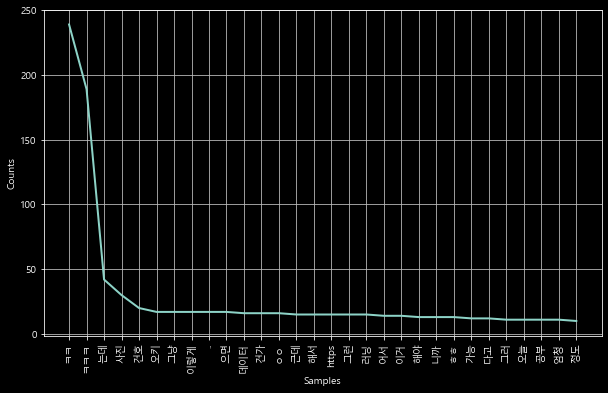

<Figure size 432x288 with 0 Axes>

In [9]:
plt.style.use("dark_background")

plt.figure(figsize=(10, 6))

text.plot(30)

plt.savefig("most_common.png")

In [95]:
words = text.vocab().most_common(1000)

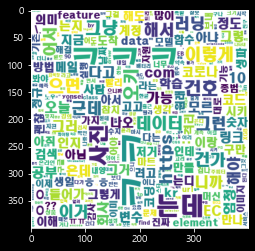

In [101]:
wc = WordCloud(font_path="C:/Windows/Fonts/HMKMRHD.TTF", background_color="white", width=400, height=400, max_words=30000, max_font_size=80)
wc.generate_from_frequencies(dict(words))

plt.imshow(wc)

wc.to_file("test.png")